Project Horse or Human classification using CNN

We have data for training:

500 horse images 527 human(male & female) images

For validation:

122 horse images 123 human(male & female) images

Problem Statement:
Classifie given image is horse or human(male/female)

Solution:
To solve this problem we are going to use Deep Learning Algorithm that is CNN (Convolutional Neural Network)

In [ ]:
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
##
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

In [ ]:
keras.__version__

'2.4.3'

load dataset

In [ ]:
train_data = "/content/drive/MyDrive/horse or human/train"
valid_data = "/content/drive/MyDrive/horse or human/validation"

In [ ]:
train_data

'/content/drive/MyDrive/horse or human/train'

In [ ]:
valid_data

'/content/drive/MyDrive/horse or human/validation'

Data preprocessing

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data =  training_datagen.flow_from_directory(train_data, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data =  valid_datagen.flow_from_directory(valid_data, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

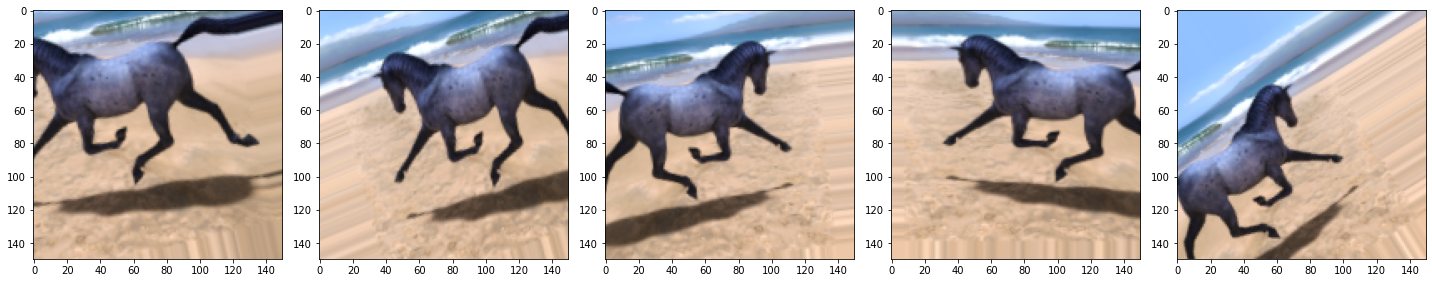

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Building CNN model

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                         
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                     
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = "/content/drive/MyDrive/horse or human/horse or human.predictor.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - 321s 10s/step - loss: 0.6750 - accuracy: 0.5675 - val_loss: 0.6297 - val_accuracy: 0.5781

Epoch 00001: val_accuracy improved from -inf to 0.57812, saving model to /content/drive/MyDrive/horse or human/horse or human.predictor.h5
Epoch 2/100
33/33 [==============================] - 61s 2s/step - loss: 0.5934 - accuracy: 0.6705 - val_loss: 0.8642 - val_accuracy: 0.5234

Epoch 00002: val_accuracy did not improve from 0.57812
Epoch 3/100
33/33 [==============================] - 60s 2s/step - loss: 0.5680 - accuracy: 0.7244 - val_loss: 0.9468 - val_accuracy: 0.5508

Epoch 00003: val_accuracy did not improve from 0.57812
Epoch 4/100
33/33 [==============================] - 59s 2s/step - loss: 0.4948 - accuracy: 0.7371 - val_loss: 1.1241 - val_accuracy: 0.5625

Epoch 00004: val_accuracy did not improve from 0.57812
Epoch 5/100
33/33 [==============================] - 60s 2s/step - loss: 0.5195 - accuracy: 0.7576 - val_loss: 1.1251 - val_ac

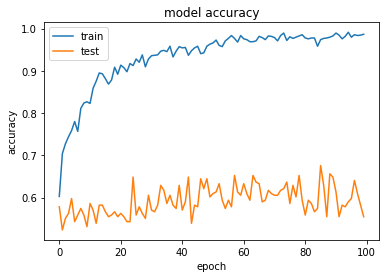

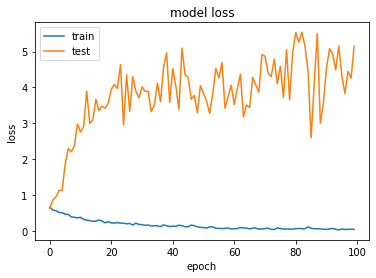

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 Predict Horse or Human
 
Here we are loading train CNN model to predict Given input (image) is Horse of Human
 

import libraries
load libraries

In [2]:
import numpy as np
 
import keras 
from keras.preprocessing.image import ImageDataGenerator
 

import model

In [3]:
model_path = "/content/drive/MyDrive/horse or human/horse or human.predictor.h5"#new model.ipynb

In [4]:
model = keras.models.load_model(model_path)

preprocessing

horse image path

In [5]:
h1 = "/content/drive/MyDrive/horse or human/test/horse/horse-1.jpg"
h2 = "/content/drive/MyDrive/horse or human/test/horse/horse-2.jpg"
h3 = "/content/drive/MyDrive/horse or human/test/horse/horse-3.jpg"
h4 = "/content/drive/MyDrive/horse or human/test/horse/horse-4.jpg"
h5 = "/content/drive/MyDrive/horse or human/test/horse/horse-5.jpg"
h6 = "/content/drive/MyDrive/horse or human/test/horse/horse-6.jpg"
h7 = "/content/drive/MyDrive/horse or human/test/horse/horse-7.jpg"
h8 = "/content/drive/MyDrive/horse or human/test/horse/horse-8.jpg"

human image path

In [9]:
hu1 = "/content/drive/MyDrive/horse or human/test/human/human-1.jpg"
hu2 = "/content/drive/MyDrive/horse or human/test/human/human-10.jpg"
hu3 = "/content/drive/MyDrive/horse or human/test/human/human-3.jpg"
hu4 = "/content/drive/MyDrive/horse or human/test/human/human-4.jpg"
hu5 = "/content/drive/MyDrive/horse or human/test/human/human-5.jpg"
hu6 = "/content/drive/MyDrive/horse or human/test/human/human-6.jpg"
hu7 = "/content/drive/MyDrive/horse or human/test/human/human-7.jpg"
hu8 = "/content/drive/MyDrive/horse or human/test/human/human-8.jpg"

In [7]:
import numpy as np
from keras.preprocessing import image

In [11]:
def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)
 
  result = model.predict(test_image).round(3)
 
  pred = np.argmax(result)
  print(result, "--->>>", pred)
 
  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')

Predicted output

In [13]:
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6]:
  pred_human_horse(model, horse_or_human)
 

[[0.83 0.17]] --->>> 0
Predicted>>> Horse
[[0.016 0.984]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0.003 0.997]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0.897 0.103]] --->>> 0
Predicted>>> Horse
[[0.996 0.004]] --->>> 0
Predicted>>> Horse
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0.999 0.001]] --->>> 0
Predicted>>> Horse
[[0.933 0.067]] --->>> 0
Predicted>>> Horse
[[0.99 0.01]] --->>> 0
Predicted>>> Horse
[[0.176 0.824]] --->>> 1
Predicted>>> Human
[[1. 0.]] --->>> 0
Predicted>>> Horse


Shivank Sharma.
Thank-you